In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt



In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("C:\\Users\\Lenovo\\Desktop\Car_price_Guvi\\cars_class\\cars_class.csv")

In [4]:
df.head(3)

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3


In [5]:
#Discribsion of the DATA set 

#Comp: Compactness
#Circ: Circularity
#D.Circ: Distance Circularity
#Rad.Ra: Radius ratio
#Pr.Axis.Ra: pr.axis aspect ratio
#Max.L.Ra: max.length aspect ratio
#Scat.Ra: scatter ratio
#Elong: elongatedness
#Pr.Axis.Rect: pr.axis rectangularity
#Max.L.Rect: max.length rectangularity
#Sc.Var.Maxis: scaled variance along major axis
#Sc.Var.maxis: scaled variance along minor axis
#Ra.Gyr: scaled radius of gyration
#Skew.Maxis: skewness about major axis
#Skew.maxis: skewness about minor axis
#Kurt.maxis: kurtosis about minor axis
#Kurt.Maxis: kurtosis about major axis
#Holl.Ra: hollows ratio

In [6]:
df.shape

(719, 20)

In [7]:
df.info()#all int values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [8]:
for i in df.columns:
    print(i,"--->",df[i].skew())

ID ---> 0.0
Comp ---> 0.36736917936763314
Circ ---> 0.2825972561780499
D.Circ ---> 0.1327081781490937
Rad.Ra ---> 0.46485849032619386
Pr.Axis.Ra ---> 3.8908086468936487
Max.L.Ra ---> 6.510635790568458
Scat.Ra ---> 0.6379352075910982
Elong ---> 0.008583474690773533
Pr.Axis.Rect ---> 0.8066170612974859
Max.L.Rect ---> 0.2824409196079615
Sc.Var.Maxis ---> 0.6935175596394899
Sc.Var.maxis ---> 0.8614160972181746
Ra.Gyr ---> 0.2716443284908072
Skew.Maxis ---> 2.284814588690171
Skew.maxis ---> 0.7267566763284129
Kurt.maxis ---> 0.6756243140232007
Kurt.Maxis ---> 0.24848068807390386
Holl.Ra ---> -0.21106602516787273
Class ---> 0.039451177599953945


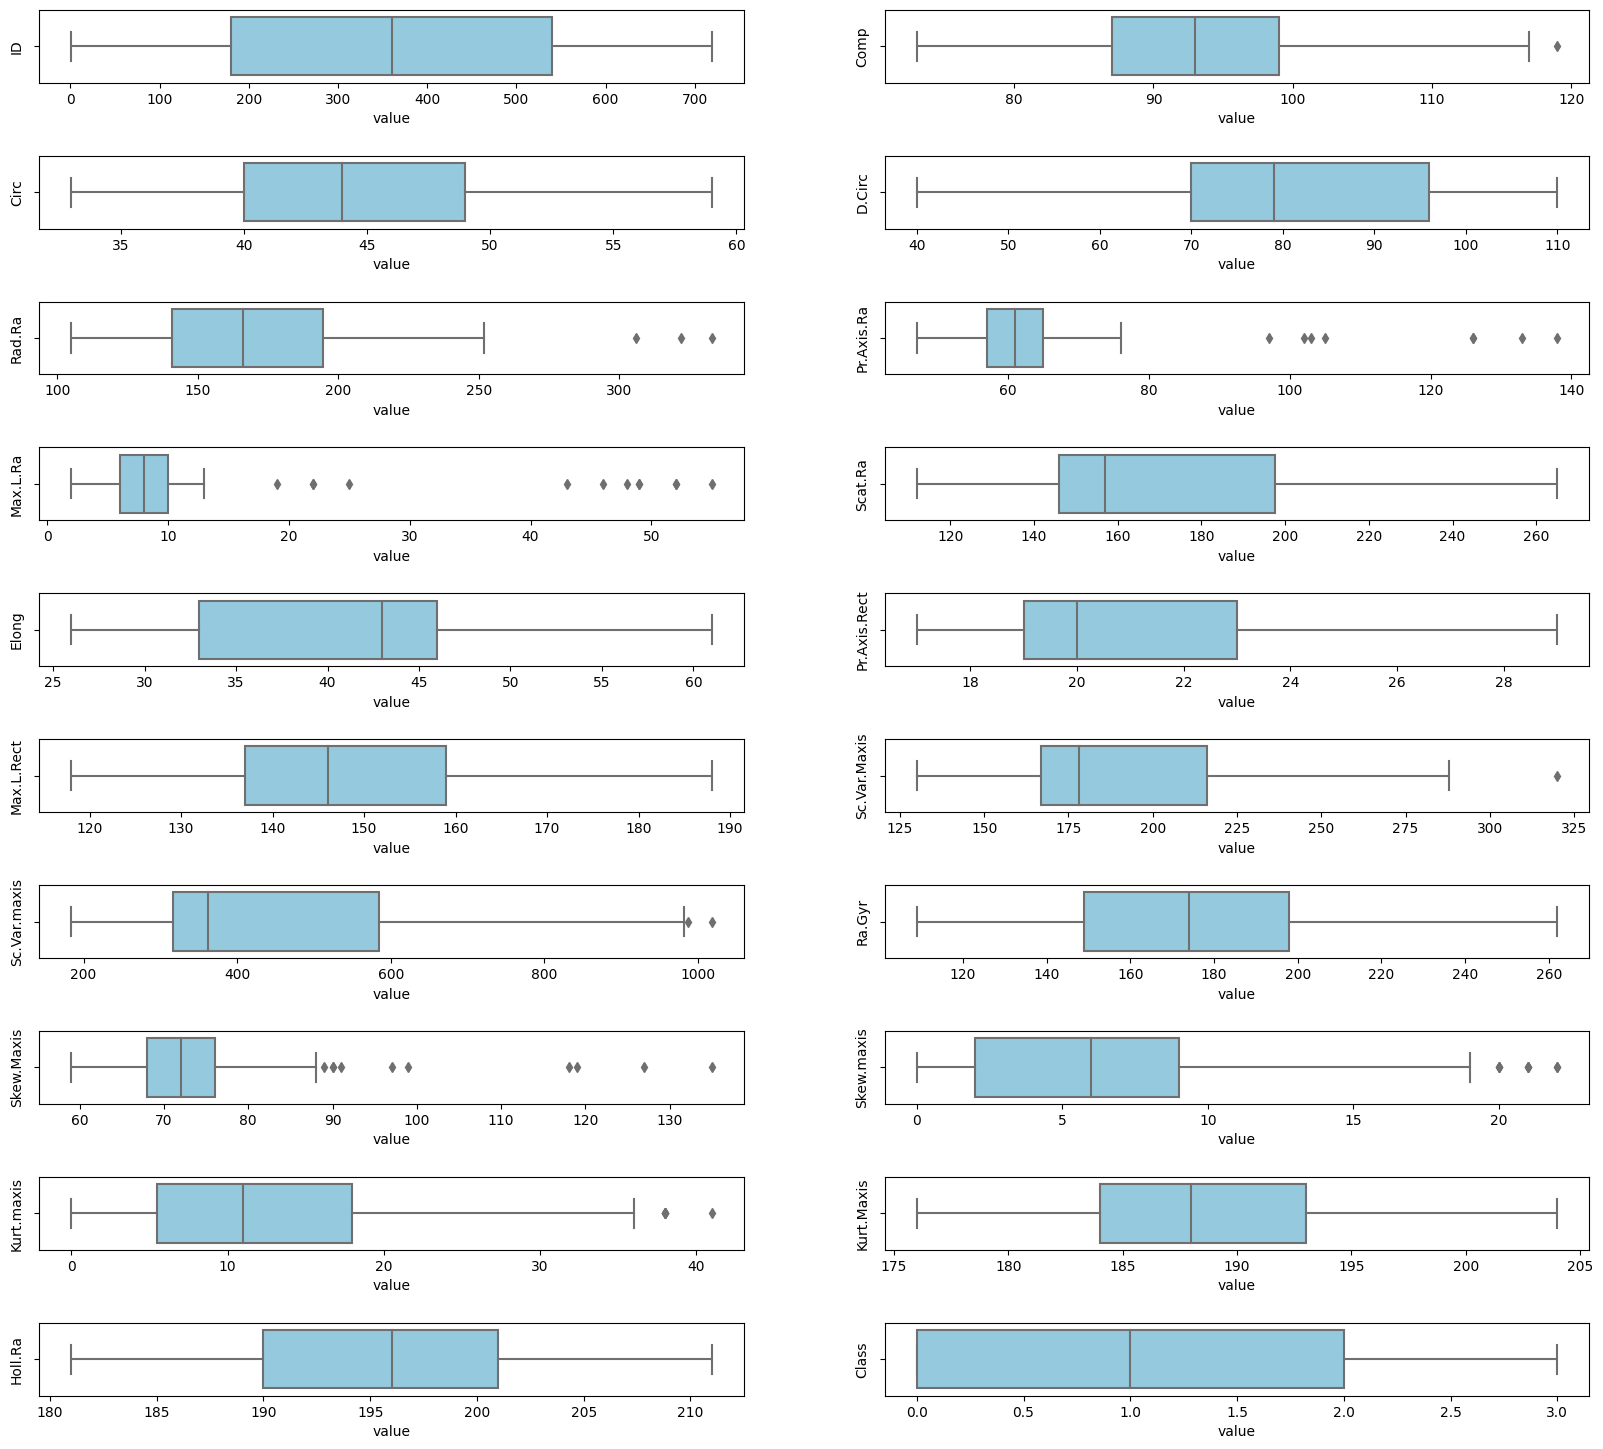

Text(0.5, 0.98, 'BOX PLOT for all the columns')

<Figure size 640x480 with 0 Axes>

In [9]:
#  BOX plot
fig, ax = plt.subplots((len(df.columns)+1)//2, 2, figsize=(20, 18))
ax=ax.ravel()

for i, feature in enumerate(df.columns):
    sns.boxplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

plt.subplots_adjust(hspace=1)
plt.show()
plt.suptitle("BOX PLOT for all the columns")

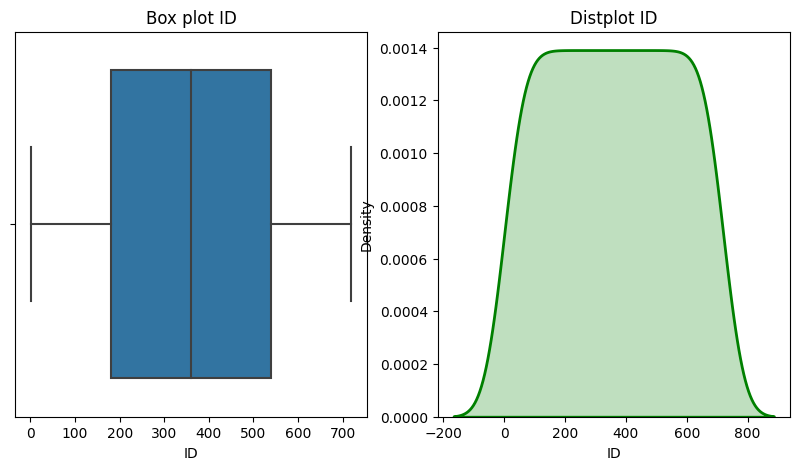

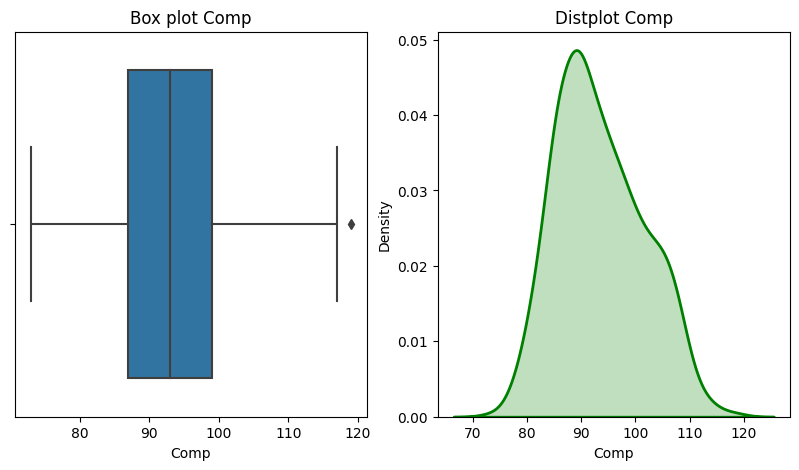

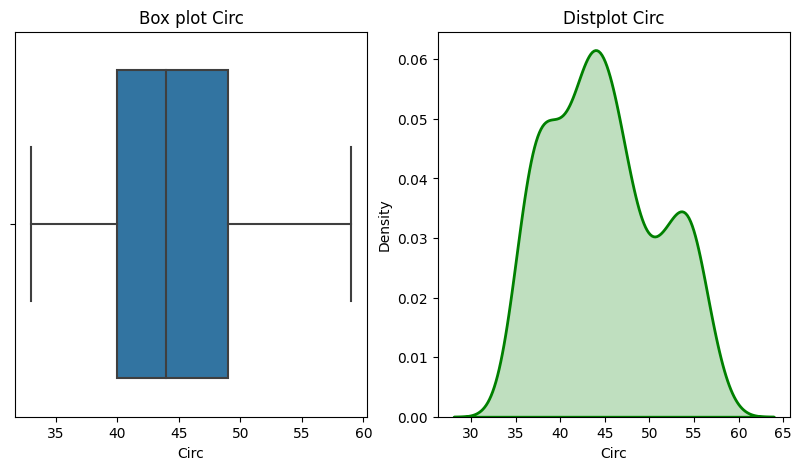

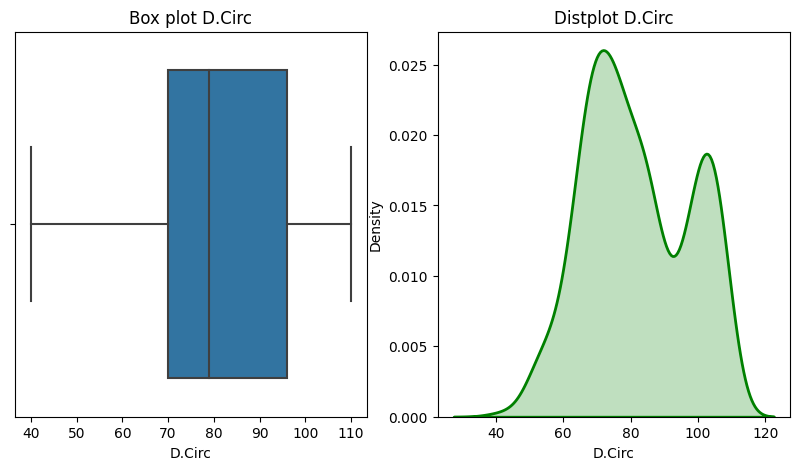

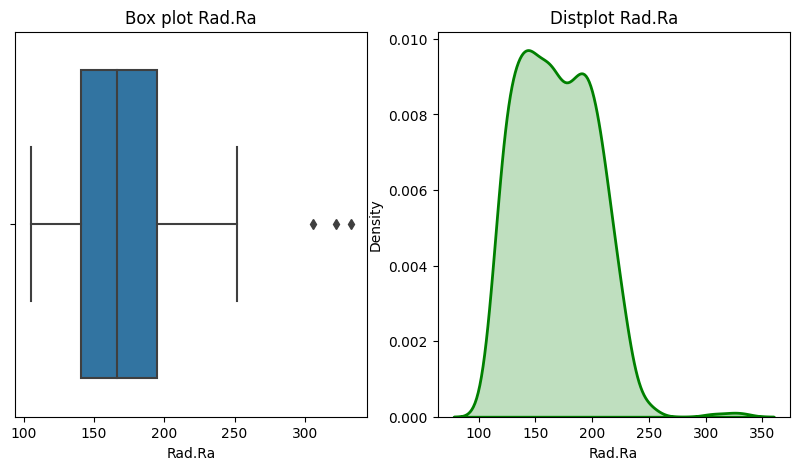

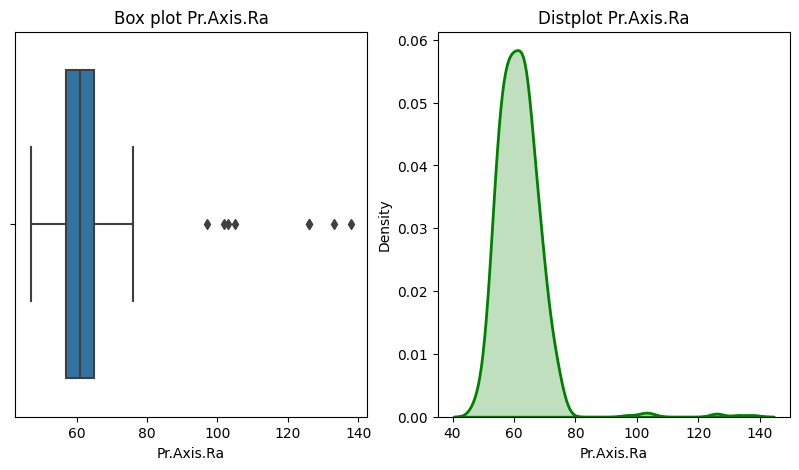

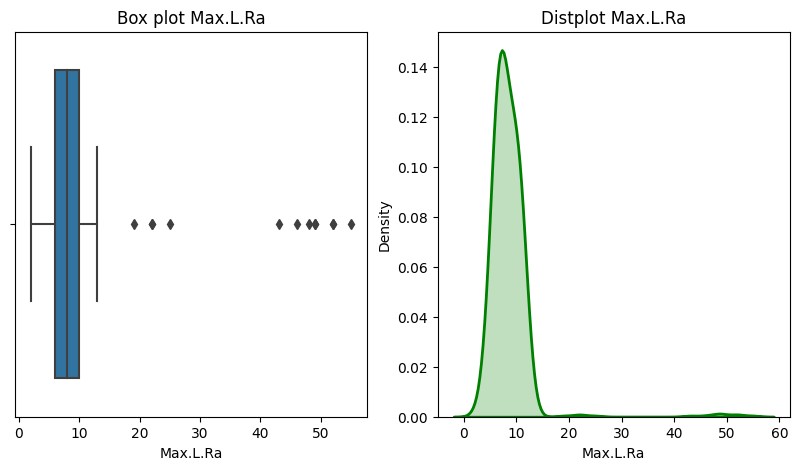

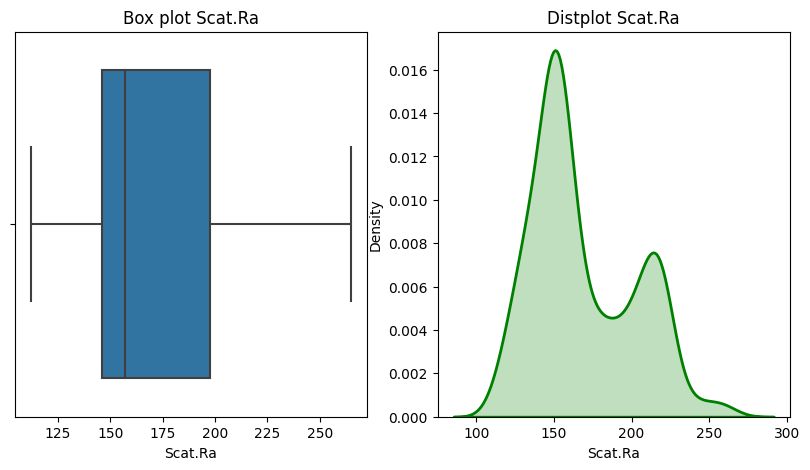

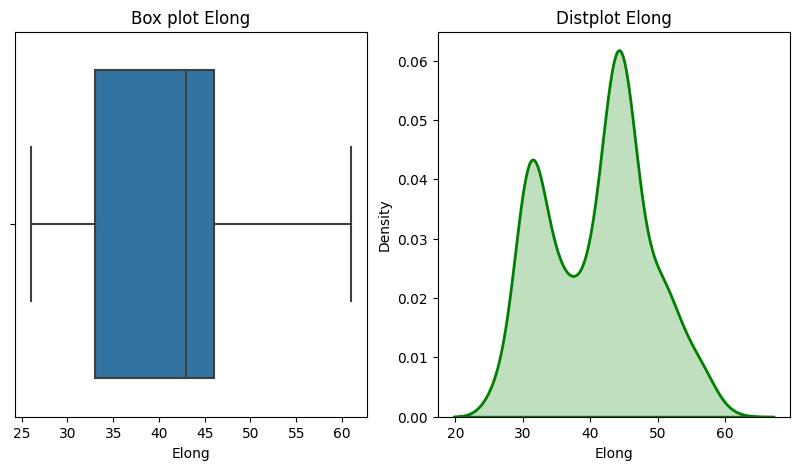

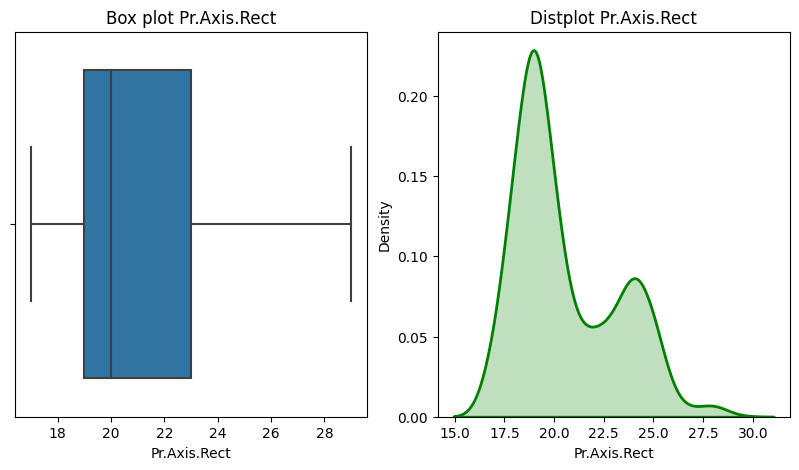

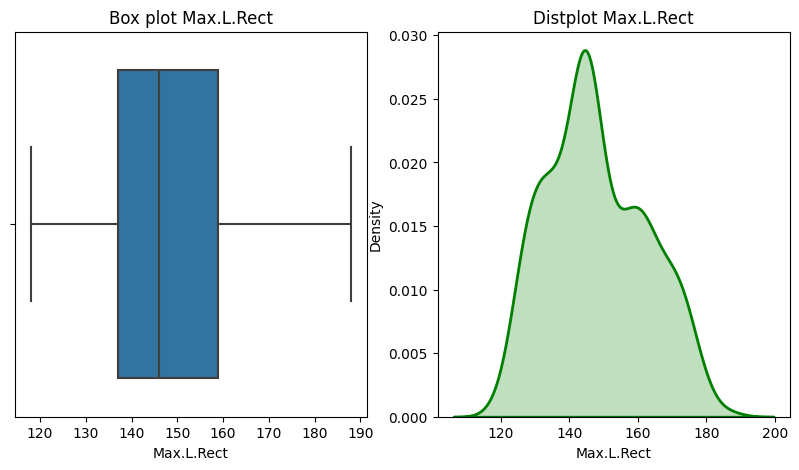

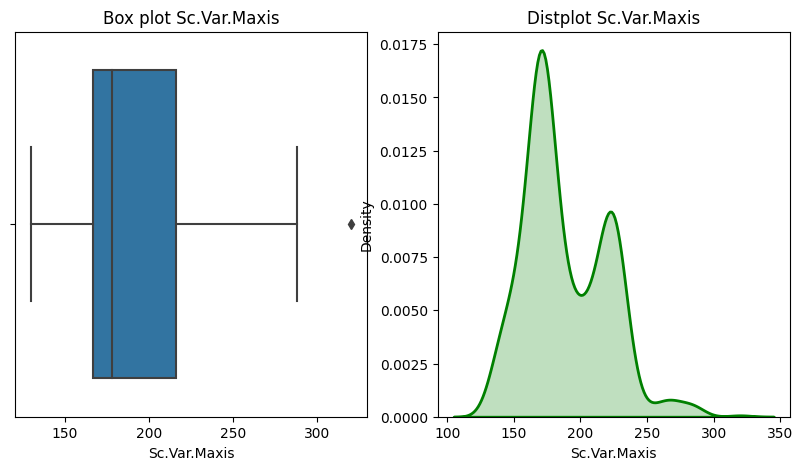

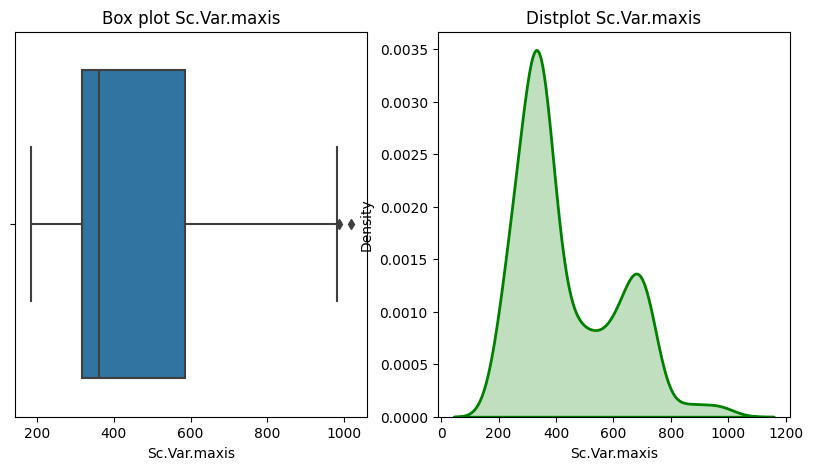

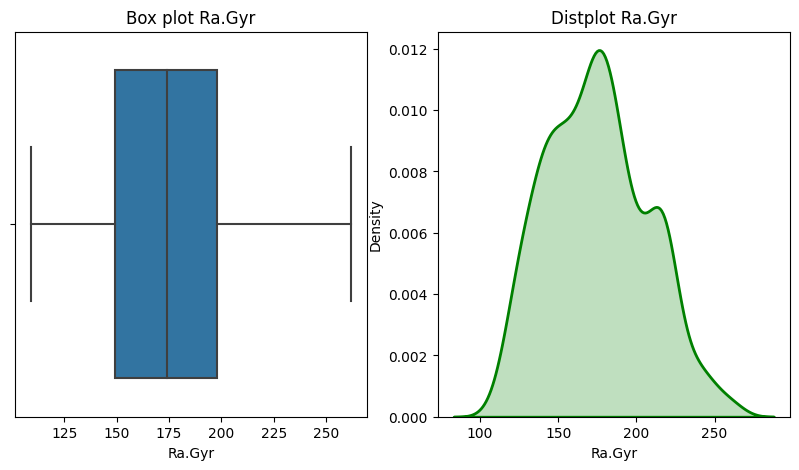

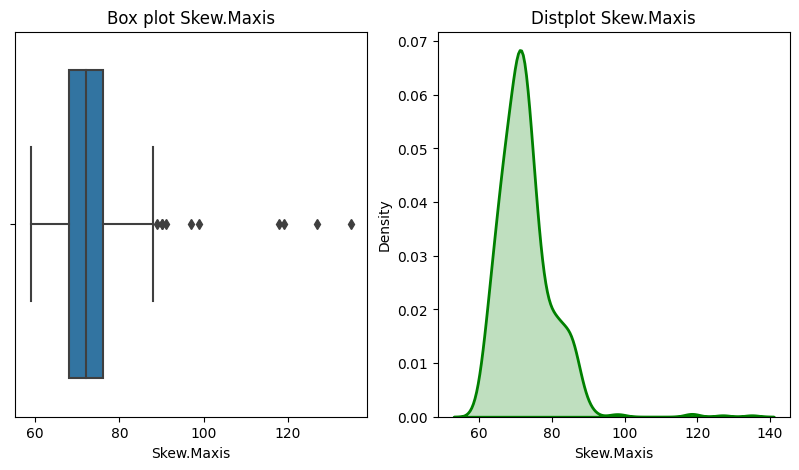

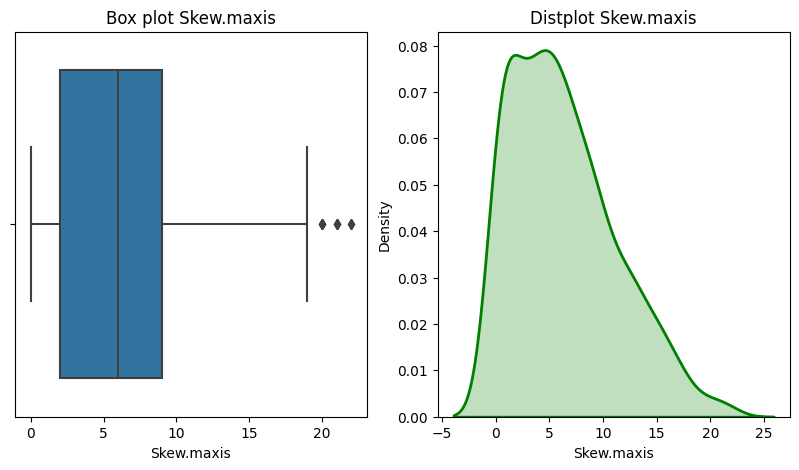

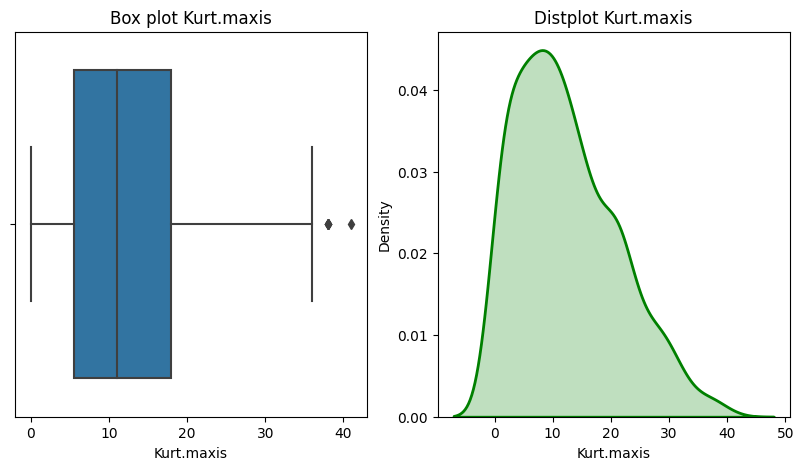

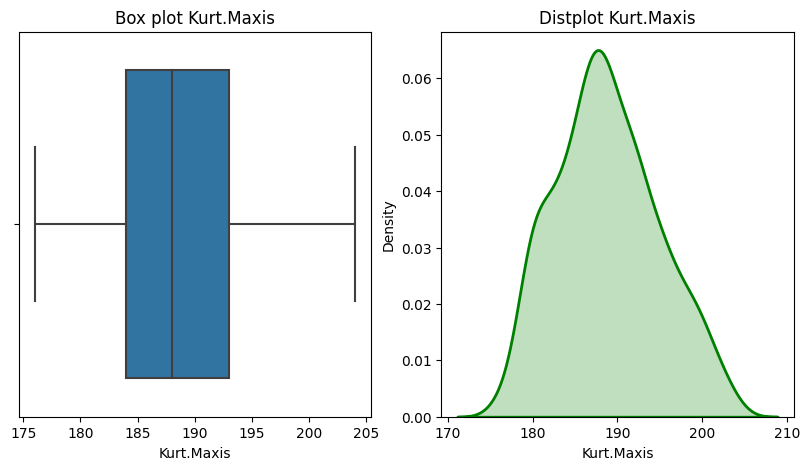

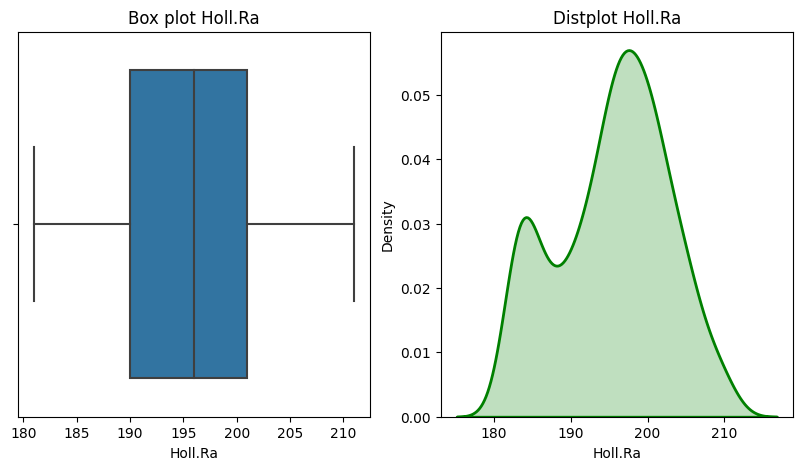

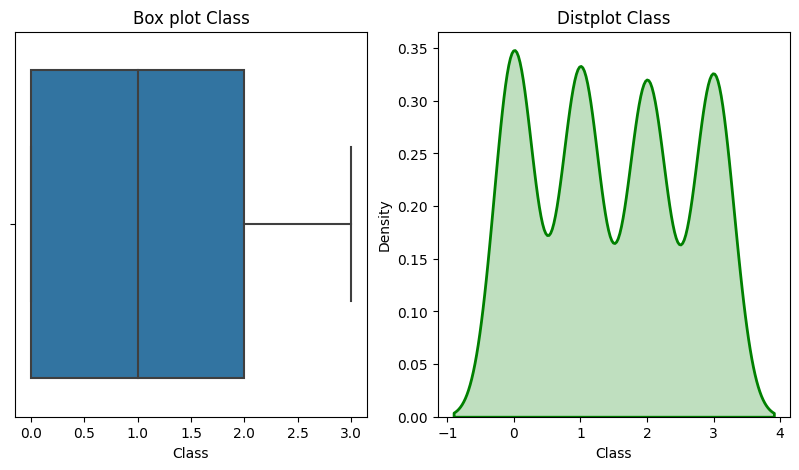

In [15]:
cols=[]
for i in df.columns:
    cols.append(i)
    
for i in   cols:  
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(df[i], ax=ax[0])
    sns.distplot(df[i], hist = False, kde = True,
                    kde_kws = {'shade': True, 'linewidth': 2},
                    label = "Normal", color ="green", ax=ax[1])
    ax[0].set_title(f"Box plot {i}")
    ax[1].set_title(f"Distplot {i}")
    plt.show()


In [ ]:
#Many columns have normally distributed data , where few has outliers 

In [16]:
##seperating the target variable and  independent variable 

x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [17]:
x.head(2)

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203


In [18]:
y.head(2)

,Class
0,0
1,3


In [19]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([189, 180, 173, 177], dtype=int64))

<BarContainer object of 4 artists>

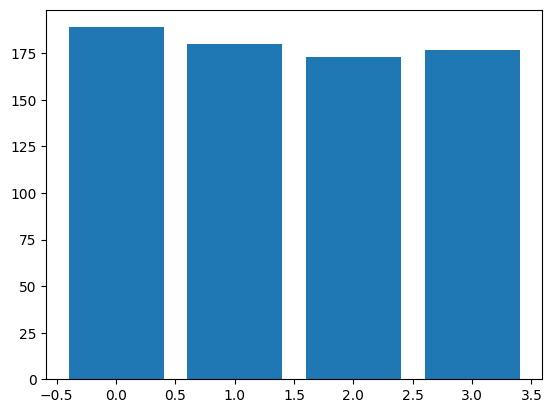

In [20]:
plt.bar(np.unique(y, return_counts=True)[0],np.unique(y, return_counts=True)[1])

In [21]:
#Distribution of each classes are almost equal 

In [22]:
#Lets , split the data into train and test sets 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
y_train.value_counts(),y_test.value_counts()

(Class
 1        150
 0        145
 3        142
 2        138
 dtype: int64,
 Class
 0        44
 2        35
 3        35
 1        30
 dtype: int64)

In [ ]:
#checking for outliers and treating or correcting 

In [26]:
def IQR(df):
    per25 = df.quantile(0.25)
    per75 = df.quantile(0.75)
    iqr=per75-per25
    upper_limit=per75+1.5*iqr
    lower_limit=per25-1.5*iqr
    
    outlier = df[((df<(lower_limit)) | (df>(upper_limit)))]
    
    #outlier =[]
    return upper_limit,lower_limit,outlier

In [27]:
outlier_col=[]
for i in X_train.columns[1:]:
    
   # print(i)
    upper,lower,out=IQR(X_train[i])
    outliers=[]
    for j in out:
        outliers.append(j)
    if len(outliers)!=0:
        outlier_col.append(i)
    print(i,":\n\tUpperLimit = ",upper,"\n\tLowerLimit = ",lower,"\n\tTotal no. of Outliers = ",len(out),'\n\tOutliers = ',outliers)
    

Comp :
	UpperLimit =  117.0 
	LowerLimit =  69.0 
	Total no. of Outliers =  1 
	Outliers =  [119]
Circ :
	UpperLimit =  62.5 
	LowerLimit =  26.5 
	Total no. of Outliers =  0 
	Outliers =  []
D.Circ :
	UpperLimit =  135.0 
	LowerLimit =  31.0 
	Total no. of Outliers =  0 
	Outliers =  []
Rad.Ra :
	UpperLimit =  273.5 
	LowerLimit =  61.5 
	Total no. of Outliers =  1 
	Outliers =  [322]
Pr.Axis.Ra :
	UpperLimit =  77.0 
	LowerLimit =  45.0 
	Total no. of Outliers =  5 
	Outliers =  [97, 126, 103, 133, 105]
Max.L.Ra :
	UpperLimit =  16.0 
	LowerLimit =  0.0 
	Total no. of Outliers =  7 
	Outliers =  [46, 52, 22, 52, 25, 48, 55]
Scat.Ra :
	UpperLimit =  276.0 
	LowerLimit =  68.0 
	Total no. of Outliers =  0 
	Outliers =  []
Elong :
	UpperLimit =  65.5 
	LowerLimit =  13.5 
	Total no. of Outliers =  0 
	Outliers =  []
Pr.Axis.Rect :
	UpperLimit =  29.0 
	LowerLimit =  13.0 
	Total no. of Outliers =  0 
	Outliers =  []
Max.L.Rect :
	UpperLimit =  194.75 
	LowerLimit =  100.75 
	Total no. o

In [28]:
upper_Comp,lower_Comp,out_Comp=IQR(X_train['Comp'])

upper_Rad_Ra,lower_Rad_Ra,out_Rad_Ra=IQR(X_train['Rad.Ra'])

upper_Pr_Axis_Ra,lower_Pr_Axis_Ra,out_Pr_Axis_Ra=IQR(X_train['Pr.Axis.Ra'])

upper_Max_L_Ra,lower_Max_L_Ra,out_Max_L_Ra=IQR(X_train['Max.L.Ra'])

upper_Sc_Var_maxis,lower_Sc_Var_maxis,out_Sc_Var_maxis=IQR(X_train['Sc.Var.maxis'])

upper_Skew_Maxis,lower_Skew_Maxis,out_Skew_Maxis=IQR(X_train['Skew.Maxis'])

upper_Skew_maxis,lower_Skew_maxis,out_Skew_maxis=IQR(X_train['Skew.maxis'])

upper_Kurt_maxis,lower_Kurt_maxis,out_Kurt_maxis=IQR(X_train['Kurt.maxis'])


In [30]:
#Treating outliers
#Here outliers are not so vaired from IQR range , and the number of outliers are also very less
#So i have reduced the outliers values to the upper bound of the IQR range 

X_train['Comp'] = np.where(X_train['Comp'] >upper_Comp, upper_Comp,X_train['Comp'])
X_train['Rad.Ra'] = np.where(X_train['Rad.Ra'] >upper_Rad_Ra, upper_Rad_Ra,X_train['Rad.Ra'])
X_train['Sc.Var.maxis'] = np.where(X_train['Sc.Var.maxis'] >upper_Sc_Var_maxis, upper_Sc_Var_maxis,X_train['Sc.Var.maxis'])
X_train['Skew.maxis'] = np.where(X_train['Skew.maxis'] >upper_Skew_maxis, upper_Skew_maxis,X_train['Skew.maxis'])
X_train['Kurt.maxis'] = np.where(X_train['Kurt.maxis'] >upper_Kurt_maxis, upper_Kurt_maxis,X_train['Kurt.maxis'])


In [31]:
#for few variables outliers are very less in numbers but the range is quite large
#So i took the 99th quantile of that variable and assigned  to all the outliers

X_train['Skew.Maxis'] = np.where(X_train['Skew.Maxis'] >upper_Skew_Maxis, X_train['Skew.Maxis'].quantile(0.99),X_train['Skew.Maxis'])
X_train['Pr.Axis.Ra'] = np.where(X_train['Pr.Axis.Ra'] >upper_Pr_Axis_Ra, X_train['Pr.Axis.Ra'].quantile(0.99),X_train['Pr.Axis.Ra'])
X_train['Max.L.Ra'] = np.where(X_train['Max.L.Ra'] >upper_Max_L_Ra, X_train['Max.L.Ra'].quantile(0.99),X_train['Max.L.Ra'])


In [32]:
outlier_col=[]
for i in X_train.columns[1:]:
    
   # print(i)
    upper,lower,out=IQR(X_train[i])
    outliers=[]
    for j in out:
        outliers.append(j)
    if len(outliers)!=0:
        outlier_col.append(i)
    print(i,":\n\tUpperLimit = ",upper,"\n\tLowerLimit = ",lower,"\n\tTotal no. of Outliers = ",len(out),'\n\tOutliers = ',outliers)
    

Comp :
	UpperLimit =  117.0 
	LowerLimit =  69.0 
	Total no. of Outliers =  0 
	Outliers =  []
Circ :
	UpperLimit =  62.5 
	LowerLimit =  26.5 
	Total no. of Outliers =  0 
	Outliers =  []
D.Circ :
	UpperLimit =  135.0 
	LowerLimit =  31.0 
	Total no. of Outliers =  0 
	Outliers =  []
Rad.Ra :
	UpperLimit =  273.5 
	LowerLimit =  61.5 
	Total no. of Outliers =  0 
	Outliers =  []
Pr.Axis.Ra :
	UpperLimit =  77.0 
	LowerLimit =  45.0 
	Total no. of Outliers =  0 
	Outliers =  []
Max.L.Ra :
	UpperLimit =  16.0 
	LowerLimit =  0.0 
	Total no. of Outliers =  7 
	Outliers =  [22.779999999999973, 22.779999999999973, 22.779999999999973, 22.779999999999973, 22.779999999999973, 22.779999999999973, 22.779999999999973]
Scat.Ra :
	UpperLimit =  276.0 
	LowerLimit =  68.0 
	Total no. of Outliers =  0 
	Outliers =  []
Elong :
	UpperLimit =  65.5 
	LowerLimit =  13.5 
	Total no. of Outliers =  0 
	Outliers =  []
Pr.Axis.Rect :
	UpperLimit =  29.0 
	LowerLimit =  13.0 
	Total no. of Outliers =  0 
	Ou

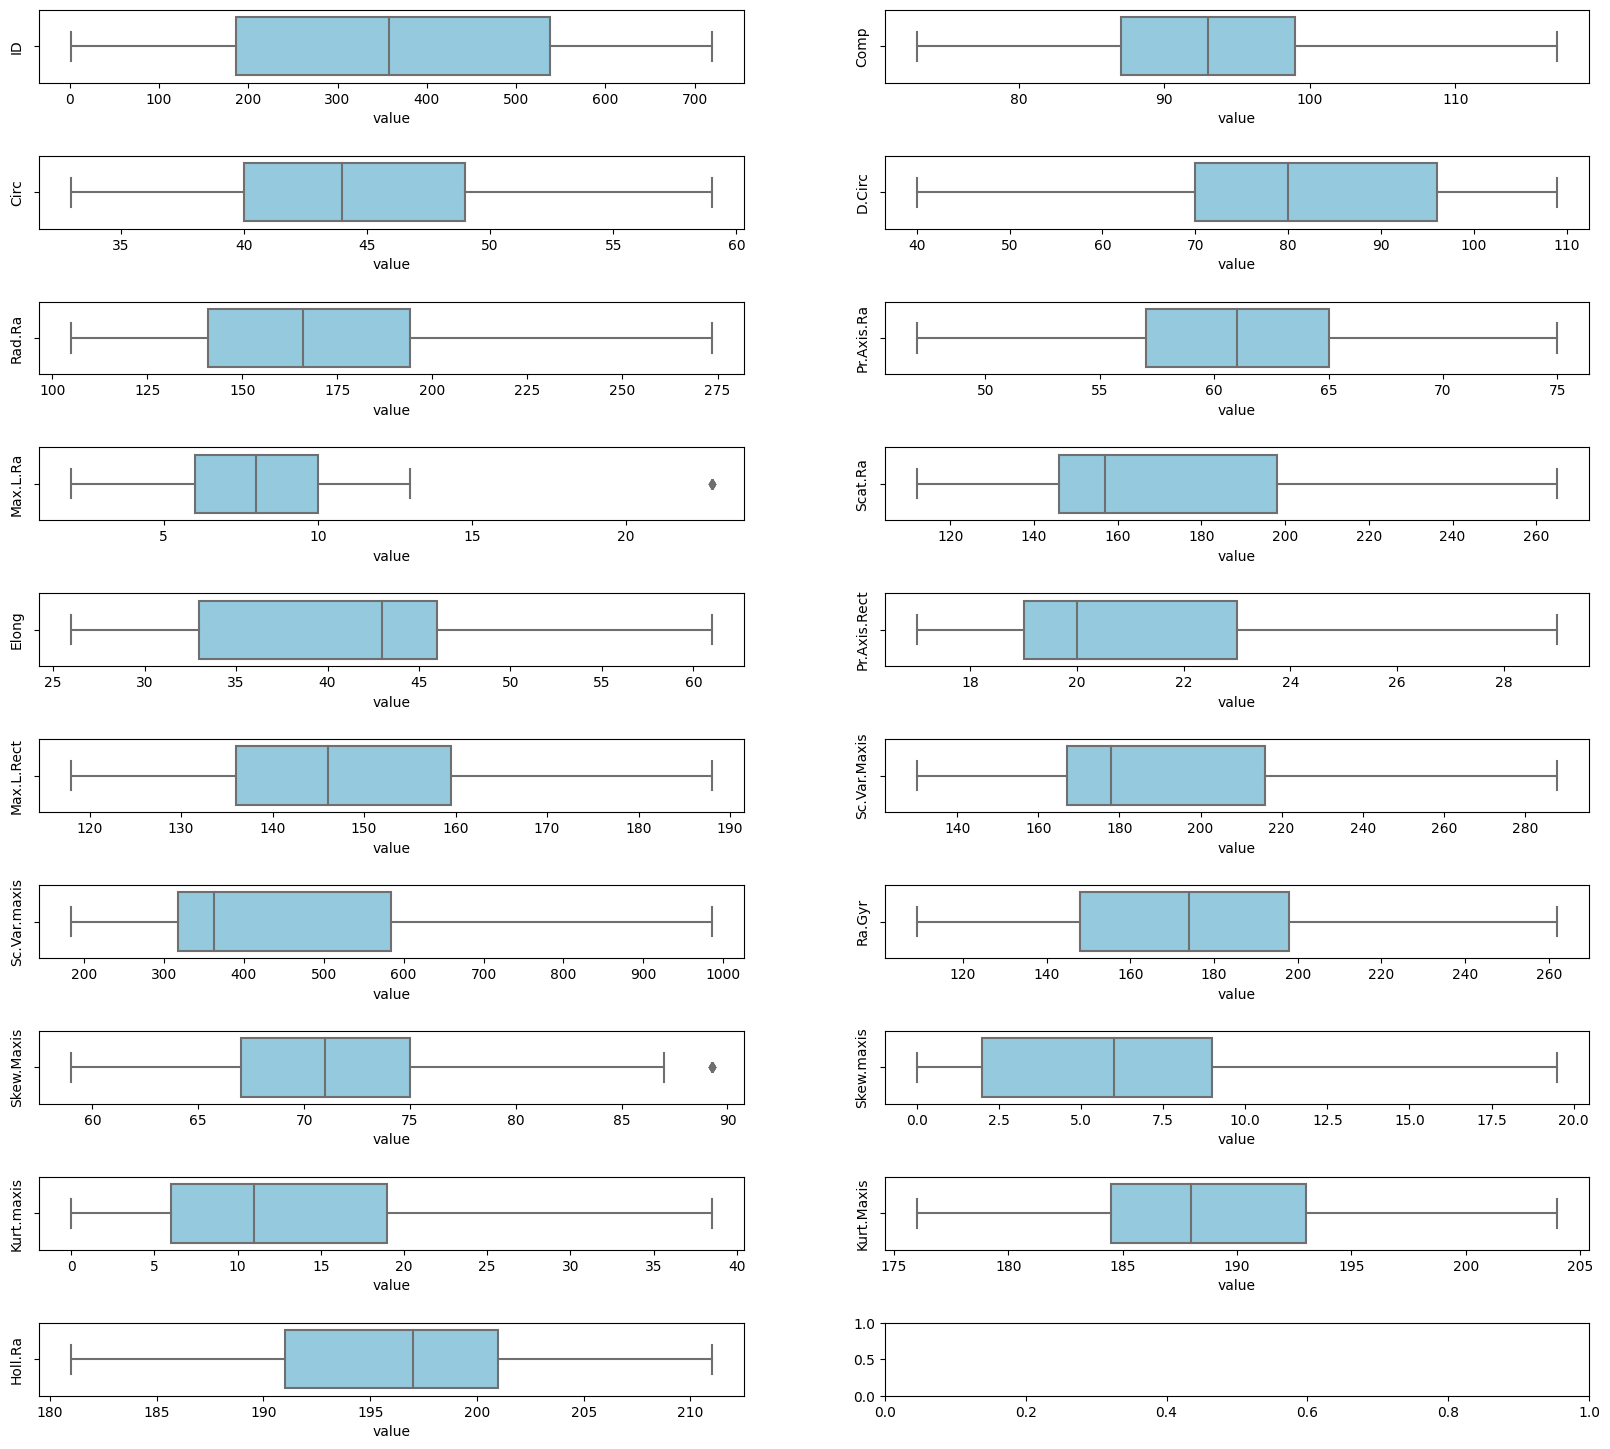

Text(0.5, 0.98, 'BOX PLOT for all the columns')

<Figure size 640x480 with 0 Axes>

In [33]:
#  BOX plot
fig, ax = plt.subplots((len(X_train.columns)+1)//2, 2, figsize=(20, 18))
ax=ax.ravel()
for i, feature in enumerate(X_train.columns):
    sns.boxplot(data=X_train, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

plt.subplots_adjust(hspace=1)
plt.show()
plt.suptitle("BOX PLOT for all the columns")

In [36]:
#Standardizing the values of all the column to be in uniform range 

In [37]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
 
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std  = std_scaler.transform(X_test)

In [38]:
X_train_std.shape,y_train.shape,X_test_std.shape,y_test.shape

((575, 19), (575, 1), (144, 19), (144, 1))

In [44]:
#Importing all the evaluation metrics 
from sklearn.metrics import accuracy_score ,precision_score , recall_score , f1_score,classification_report

In [45]:
from sklearn.model_selection import GridSearchCV ,KFold , StratifiedKFold

Implementing ML models on the dataset for classification

# KNN clssification

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#training model on default parameters
knn_model=KNeighborsClassifier()

In [41]:
knn_model.fit(X_train_std,y_train)

knn_pred= knn_model.predict(X_test_std)

In [46]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.44      0.37      0.40        30
           2       0.61      0.57      0.59        35
           3       0.86      0.89      0.87        35

    accuracy                           0.72       144
   macro avg       0.69      0.69      0.69       144
weighted avg       0.70      0.72      0.71       144



In [47]:
kfold=KFold(n_splits=5)
params= {'n_neighbors':[1,2,3,4,5,6],
        'metric':['euclidean','manhattan','cosine'],'p':[1,2],
        'weights':['uniform', 'distance']}

knn_gcv1 = GridSearchCV(knn_model,param_grid=params,cv=kfold,scoring='accuracy')

knn_gcv1.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
print("Best parameters:\n",knn_gcv1.best_params_,'\nBest Score :',knn_gcv1.best_score_)

Best parameters:
 {'metric': 'cosine', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'} 
Best Score : 0.7304347826086957


In [54]:
#Training the model after finding the best parameters
knn_model_best=KNeighborsClassifier(metric='cosine',n_neighbors=4,p=1,weights='distance')

knn_model_best.fit(X_train_std,y_train)

knn_pred_best= knn_model_best.predict(X_test_std)

In [55]:
print(classification_report(y_test,knn_pred_best))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.44      0.40      0.42        30
           2       0.58      0.54      0.56        35
           3       0.84      0.91      0.88        35

    accuracy                           0.74       144
   macro avg       0.70      0.71      0.70       144
weighted avg       0.72      0.74      0.73       144



In [231]:
accuracy_score(y_test,knn_pred_best)

0.7361111111111112

# LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
#training model on default parameters
logi_model=LogisticRegression()

In [58]:
logi_model.fit(X_train_std,y_train)



LogisticRegression()

In [59]:
logi_pred = logi_model.predict(X_test_std)

In [60]:
print(logi_model.intercept_,'\n',logi_model.coef_.shape)

[-0.09424511  0.88194278  0.85087701 -1.63857468] 
 (4, 19)


In [61]:
logi_pred

array([3, 2, 0, 2, 0, 1, 0, 3, 0, 2, 0, 2, 0, 0, 0, 3, 1, 3, 3, 3, 1, 1,
       1, 0, 2, 1, 0, 2, 3, 3, 0, 3, 2, 2, 1, 0, 2, 1, 2, 2, 3, 3, 0, 3,
       0, 0, 2, 3, 2, 3, 0, 1, 2, 0, 3, 2, 3, 2, 0, 0, 3, 3, 3, 2, 2, 1,
       1, 2, 3, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 3, 0, 0, 2, 2, 1, 0, 0, 1,
       3, 3, 3, 0, 0, 0, 2, 3, 3, 3, 0, 2, 3, 3, 1, 2, 1, 2, 0, 2, 0, 2,
       3, 3, 2, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 1, 0, 2, 0, 3, 2, 3,
       0, 3, 0, 1, 2, 2, 0, 0, 2, 3, 2, 0], dtype=int64)

In [62]:
logi_model.predict_proba(X_test_std)

array([[9.58551386e-03, 5.61946167e-02, 8.02763783e-02, 8.53943491e-01],
       [7.43106622e-04, 2.65035889e-01, 7.33832446e-01, 3.88558089e-04],
       [7.98765261e-01, 1.00239143e-01, 6.02636559e-02, 4.07319400e-02],
       [7.38933832e-03, 2.97788815e-01, 6.94677527e-01, 1.44319173e-04],
       [9.84128389e-01, 1.08939365e-02, 4.97766241e-03, 1.22327948e-08],
       [1.42020680e-02, 4.89031774e-01, 3.81838709e-01, 1.14927450e-01],
       [6.78719730e-01, 1.47667414e-01, 1.72357868e-01, 1.25498880e-03],
       [1.68815086e-01, 1.22933288e-01, 7.98097325e-02, 6.28441894e-01],
       [5.35551175e-01, 9.36660494e-02, 3.60978159e-01, 9.80461678e-03],
       [1.51782411e-02, 8.23747098e-02, 9.02163277e-01, 2.83772216e-04],
       [5.49045815e-01, 1.58155464e-01, 1.73542788e-01, 1.19255934e-01],
       [1.10734492e-01, 2.81478628e-01, 5.81491830e-01, 2.62950496e-02],
       [9.18516101e-01, 6.29113397e-02, 1.85724653e-02, 9.40816012e-08],
       [9.49656883e-01, 8.39437326e-03, 1.34087926e

In [67]:
accuracy_score(y_test,logi_pred)

0.7986111111111112

In [69]:
print(classification_report(y_test,logi_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.61      0.47      0.53        30
           2       0.69      0.69      0.69        35
           3       0.89      0.97      0.93        35

    accuracy                           0.80       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.78      0.80      0.79       144



In [71]:
stratifiedkfold=StratifiedKFold(n_splits=5)
params= {'penalty' : ['l1','l2'], 
         'C'       : np.logspace(-3,3,7),
         'solver'  : ['newton-cg', 'lbfgs', 'liblinear','saga']}

logi_gcv = GridSearchCV(logi_model,param_grid=params,cv=stratifiedkfold,scoring='accuracy')

logi_gcv.fit(X_train_std,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [72]:
logi_gcv.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [73]:
logi_gcv.best_score_

0.7930434782608696

In [74]:
logi_gcv_pred = logi_gcv.predict(X_test_std)

In [75]:
accuracy_score(y_test,logi_gcv_pred)

0.8194444444444444

In [76]:
print(classification_report(y_test,logi_gcv_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.61      0.57      0.59        30
           2       0.68      0.71      0.69        35
           3       0.95      1.00      0.97        35

    accuracy                           0.82       144
   macro avg       0.80      0.80      0.80       144
weighted avg       0.82      0.82      0.82       144



In [80]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier,OutputCodeClassifier

logi_model_tuned=LogisticRegression(C= 1000.0, penalty= 'l2', solver= 'lbfgs')
ovr=OneVsRestClassifier(logi_model_tuned)
ovr.fit(X_train_std,y_train)
ovr_pre=ovr.predict(X_test_std)
print("OneVsRestClassifier",accuracy_score(y_test,ovr_pre))


ovo=OneVsOneClassifier(logi_model_tuned)
ovo.fit(X_train_std,y_train)
ovo_pre=ovr.predict(X_test_std)
print('OneVsOneClassifier',accuracy_score(y_test,ovo_pre))

occ=OutputCodeClassifier(logi_model_tuned,code_size=1.5)
occ.fit(X_train_std,y_train)
occ_pre=ovr.predict(X_test_std)
print('OutputCodeClassifier',accuracy_score(y_test,occ_pre))

OneVsRestClassifier 0.8194444444444444
OneVsOneClassifier 0.8194444444444444
OutputCodeClassifier 0.8194444444444444


# SVM(support vector machine)

In [144]:
from sklearn.svm import SVC

svc_model=SVC()

In [145]:
svc_model.fit(X_train_std,y_train)

svc_pred = svc_model.predict(X_test_std)

In [146]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.45      0.47      0.46        30
           2       0.59      0.49      0.53        35
           3       0.80      0.91      0.85        35

    accuracy                           0.72       144
   macro avg       0.69      0.70      0.69       144
weighted avg       0.72      0.72      0.72       144



In [147]:
accuracy_score(y_test,svc_pred)

0.7222222222222222

In [148]:
stratifiedkfold=StratifiedKFold(n_splits=5)

param_grid = {'C': [0.1,0.5,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid','linear']}

svc_gcv= GridSearchCV(svc_model,param_grid=param_grid,cv=stratifiedkfold,scoring='accuracy')

In [149]:
svc_gcv.fit(X_train_std,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy')

In [150]:
svc_gcv_pred= svc_gcv.predict(X_test_std)

In [151]:
svc_gcv.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [152]:
svc_gcv.best_score_

0.8052173913043477

In [153]:
accuracy_score(y_test,svc_gcv_pred)

0.7777777777777778

In [154]:
print(classification_report(y_test,svc_gcv_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.48      0.43      0.46        30
           2       0.61      0.71      0.66        35
           3       0.97      0.89      0.93        35

    accuracy                           0.78       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.78      0.78      0.78       144



# Decision Tree Classification

In [155]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()

In [156]:
dtc_model.fit(X_train_std,y_train)

dtc_pred= dtc_model.predict(X_test_std)

In [157]:
accuracy_score(y_test,dtc_pred)

0.6944444444444444

In [158]:
#Decisiontreeclassification on original data , without standardizing

dtc_model_1=DecisionTreeClassifier()
dtc_model_1.fit(X_train,y_train)

dtc_pred_1= dtc_model_1.predict(X_test)

In [159]:
accuracy_score(y_test,dtc_pred_1)

0.6944444444444444

In [164]:
stratifiedkfold=StratifiedKFold(n_splits=5)
params={'criterion':['gini','entropy'],
       'splitter':['best','random'],
       'max_features':[5,10,15,19],
       'max_depth':[3,5,10]}
dtc_gcv=GridSearchCV(dtc_model_1,param_grid=params,cv=stratifiedkfold,scoring='accuracy')
dtc_gcv.fit(X_train_std,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': [5, 10, 15, 19],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [169]:
dtc_pred_1_1_2= dtc_gcv.predict(X_test_std)

In [170]:
dtc_gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 15,
 'splitter': 'best'}

In [171]:
accuracy_score(y_test,dtc_pred_1_1_2)

0.6875

In [172]:
stratifiedkfold=StratifiedKFold(n_splits=5)

params={'criterion':['gini','entropy'],
       'splitter':['best','random'],
       'max_features':[5,10,15,19],
       'max_depth':[3,5,10]}
dtc_gcv=GridSearchCV(dtc_model_1,param_grid=params,cv=stratifiedkfold,scoring='accuracy')
dtc_gcv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': [5, 10, 15, 19],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [173]:
dtc_pred_1_1= dtc_gcv.predict(X_test)

In [174]:
dtc_gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 15,
 'splitter': 'best'}

In [175]:
accuracy_score(y_test,dtc_pred_1_1)

0.7291666666666666

In [176]:
print(classification_report(y_test,dtc_pred_1_1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.45      0.50      0.48        30
           2       0.50      0.40      0.44        35
           3       0.94      0.94      0.94        35

    accuracy                           0.73       144
   macro avg       0.70      0.71      0.70       144
weighted avg       0.72      0.73      0.72       144



In [218]:
a=df.iloc[: , 1:19]

b=df.iloc[: , 19:]


In [219]:
stratifiedkfold=StratifiedKFold(n_splits=5)

params={'criterion':['gini','entropy'],
       'splitter':['best','random'],
       'max_features':[5,10,15,19],
       'max_depth':[3,5,10]}
dtc_gcv=GridSearchCV(dtc_model_1,param_grid=params,cv=stratifiedkfold,scoring='accuracy')
dtc_gcv.fit(a,b)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': [5, 10, 15, 19],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [220]:
dtc_gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 19,
 'splitter': 'best'}

In [221]:
dtc_gcv.best_score_

0.724582362082362

# Random Forest classification

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rfc_model=RandomForestClassifier()

rfc_model.fit(X_train_std,y_train)

RandomForestClassifier()

In [179]:
rfc_pred_1=rfc_model.predict(X_test_std)

In [180]:
accuracy_score(y_test,rfc_pred_1)

0.7430555555555556

In [182]:
print(classification_report(rfc_pred_1, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.40      0.46      0.43        26
           2       0.49      0.53      0.51        32
           3       0.97      0.87      0.92        39

    accuracy                           0.74       144
   macro avg       0.71      0.70      0.71       144
weighted avg       0.77      0.74      0.75       144



In [222]:
rfc_model=RandomForestClassifier()

rfc_model.fit(X_train,y_train)

rfc_pred_1_1=rfc_model.predict(X_test)

In [223]:
accuracy_score(y_test,rfc_pred_1_1)

0.7708333333333334

In [224]:
stratifiedkfold=StratifiedKFold(n_splits=5)

param_grid = {
    'n_estimators': [5,25, 50, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, 6, 9],
    'min_samples_split':[2,4,5],
    'min_samples_leaf':[3,4,6],
}




In [225]:
rfc_gcv = GridSearchCV(estimator = rfc_model, param_grid = param_grid, cv = stratifiedkfold)




In [226]:
rfc_gcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 6],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [5, 25, 50, 100, 150]})

In [227]:
rfc_gcv_pred= rfc_gcv.predict(X_test)

In [228]:
rfc_gcv.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 25}

In [229]:
rfc_gcv.best_score_

0.7565217391304347

In [230]:
accuracy_score(y_test,rfc_gcv_pred)

0.7361111111111112

# LogisticRegression Out perform  welll when compared to other 